# <font color=#219ebc>Recommandation de films - Nettoyage/Exploration </font>

# Sommaire
* [Configuration](#Configuration)
* [Chargement des données](#Chargement-des-donnees)
* [Nettoyage](#Nettoyage)
    * [Valeurs manquantes](#Valeurs-manquantes)
    * [Dedoublonnage](#Dedoublonnage)
    * [Préparation des données](#Preparation-des-donnees)
    * [Binarisation](#Binarisation)
        * [Genres](#Genres)
        * [Intrigues](#Intrigues)
* [Exploration](#Exploration)
    * [Boxplots](#Boxplots)
    * [Matrice de corrélation](#Matrice-de-correlation)
    * [Histogrammes](#Histogrammes)
* [Ecriture des données](#Ecriture-des-donnees)

## <font color=#fb8500>Configuration</font>

On configure l'affichage de matplotlib en utilisant seaborn, cela nous permettra d'avoir un joli affichage et de profiter des performances de matplotlib

In [1]:
import matplotlib as mplt

import seaborn as sns
sns.set(font='Franklin Gothic Book',rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

# use the .set_context() method to fine-tune font size settings.
#sns.set_context("notebook", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":14})

mplt.font_manager._rebuild()

## <font color=#fb8500>Chargement des donnees</font>

In [2]:
import time
start=time.time()

In [3]:
import pandas as pd

df=pd.read_csv("../Dataset/movie_metadata.csv",sep=",",encoding="utf-8")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## <font color=#fb8500>Nettoyage</font>

### <font color=#ffb703>Valeurs manquantes</font>

In [5]:
sNombreValeursManquantes=df.isna().sum()
sNombreValeursManquantes

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
import numpy as np

nombreIndividus=len(df)
sPourcentageValeursManquantes=(np.round(sNombreValeursManquantes/nombreIndividus*100,2)).sort_values()
sPourcentageValeursManquantes

cast_total_facebook_likes     0.00
imdb_score                    0.00
movie_imdb_link               0.00
num_voted_users               0.00
movie_title                   0.00
genres                        0.00
movie_facebook_likes          0.00
country                       0.10
actor_1_facebook_likes        0.14
actor_1_name                  0.14
language                      0.24
actor_2_facebook_likes        0.26
actor_2_name                  0.26
facenumber_in_poster          0.26
duration                      0.30
color                         0.38
num_user_for_reviews          0.42
actor_3_facebook_likes        0.46
actor_3_name                  0.46
num_critic_for_reviews        0.99
director_facebook_likes       2.06
director_name                 2.06
title_year                    2.14
plot_keywords                 3.03
content_rating                6.01
aspect_ratio                  6.52
budget                        9.76
gross                        17.53
dtype: float64

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


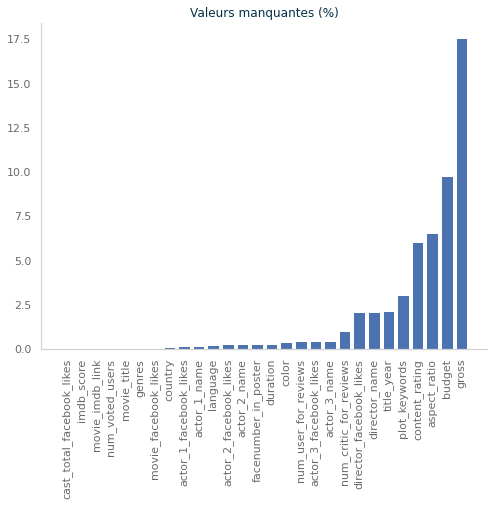

In [7]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (8,6)

plt.bar(sPourcentageValeursManquantes.index,sPourcentageValeursManquantes)
plt.xticks(rotation=90)
plt.title('Valeurs manquantes (%)',color='#023047')

plt.show()

Les variables *gross (CA brut)* et *budget* sont celles présentant le plus de variables manquantes => imputation? ou recherche de correlation avec d'autres variables

In [8]:
# identification des colonnes numériques et qualitatives
colonnesQuantitatives=df.select_dtypes(np.number).columns.tolist()
colonnesQualitatives=df.select_dtypes('O').columns.tolist()

### <font color=#ffb703>Dedoublonnage</font>

In [9]:
# Avant dédoublonnage
pd.set_option('display.min_rows', 12)
(df.groupby(['movie_title','director_name']).size().reset_index(name='count')).sort_values(by='count',ascending=False)

,movie_title,director_name,count
489,Ben-Hur,Timur Bekmambetov,3
1558,Halloween,John Carpenter,3
1679,Home,Tim Johnson,3
4602,Victor Frankenstein,Paul McGuigan,3
2618,Pan,Joe Wright,3
1988,King Kong,Peter Jackson,3
...,...,...,...
1632,Hereafter,Clint Eastwood,1
1631,Here on Earth,Mark Piznarski,1
1630,Here Comes the Boom,Frank Coraci,1


In [10]:
# identification(masque) des lignes en doublons sur le couple film/realisateur
maskDuplicates=df.duplicated(subset=['movie_title','director_name'])
dfUnique=df[~maskDuplicates]

In [11]:
# Après dédoublonnage
pd.set_option('display.min_rows', 10)
(df[~maskDuplicates].groupby(['movie_title','director_name']).size().reset_index(name='count')).sort_values(by='count',ascending=False)

,movie_title,director_name,count
0,#Horror,Tara Subkoff,1
3218,Spider-Man,Sam Raimi,1
3216,Spider-Man 2,Sam Raimi,1
3215,Spice World,Bob Spiers,1
3214,Sphinx,Franklin J. Schaffner,1
...,...,...,...
1605,He Got Game,Spike Lee,1
1604,Haywire,Steven Soderbergh,1
1603,Hayride,Terron R. Parsons,1
1602,Hav Plenty,Christopher Scott Cherot,1


### <font color=#ffb703>Preparation des donnees</font>

On va remplacer les caracteres speciaux dans "genres" pour faciliter la categorisation des films ultérieuremnt

In [12]:
import re
import copy

dfGenres=copy.deepcopy(df[['genres']][~maskDuplicates])
f = lambda x: (re.sub('Sci-Fi','Sci_Fi',str(x)))
dfGenres=dfGenres.applymap(f)
f = lambda x: (re.sub('Film-Noir','Film_Noir',str(x)))
dfGenres=dfGenres[['genres']].applymap(f)
f = lambda x: (re.sub('Reality-TV','Reality_TV',str(x)))
dfGenres=dfGenres[['genres']].applymap(f)
f = lambda x: (re.sub('Game-Show','Game_Show',str(x)))
dfGenres=dfGenres[['genres']].applymap(f)

dfGenres['genres'].head(20)

0                       Action|Adventure|Fantasy|Sci_Fi
1                              Action|Adventure|Fantasy
2                             Action|Adventure|Thriller
3                                       Action|Thriller
4                                           Documentary
5                               Action|Adventure|Sci_Fi
6                              Action|Adventure|Romance
7     Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                               Action|Adventure|Sci_Fi
9                      Adventure|Family|Fantasy|Mystery
10                              Action|Adventure|Sci_Fi
11                              Action|Adventure|Sci_Fi
12                                     Action|Adventure
13                             Action|Adventure|Fantasy
14                             Action|Adventure|Western
15                      Action|Adventure|Fantasy|Sci_Fi
16                      Action|Adventure|Family|Fantasy
17                              Action|Adventure

On reformate les noms composés dans "plot_keywords" pour conserver les mots clés comme "marriage_proposal" ou "fairy_tale" afin de faciliter la catégorisation des films ultérieuremnt

In [13]:
import re
import copy

dfPlot=copy.deepcopy(df[['plot_keywords']][~maskDuplicates])
f = lambda x: (re.sub(' ','_',str(x)))
dfPlot=dfPlot.applymap(f)
dfPlot['plot_keywords'].head(20)

0                avatar|future|marine|native|paraplegic
1     goddess|marriage_ceremony|marriage_proposal|pi...
2                   bomb|espionage|sequel|spy|terrorist
3     deception|imprisonment|lawlessness|police_offi...
4                                                   nan
5     alien|american_civil_war|male_nipple|mars|prin...
6             sandman|spider_man|symbiote|venom|villain
7     17th_century|based_on_fairy_tale|disney|flower...
8     artificial_intelligence|based_on_comic_book|ca...
9                      blood|book|love|potion|professor
10    based_on_comic_book|batman|sequel_to_a_reboot|...
11    crystal|epic|lex_luthor|lois_lane|return_to_earth
12    action_hero|attempted_rape|bond_girl|official_...
13    box_office_hit|giant_squid|heart|liar's_dice|m...
14                horse|outlaw|texas|texas_ranger|train
15    based_on_comic_book|british_actor_playing_amer...
16    brother_brother_relationship|brother_sister_re...
17      alien_invasion|assassin|battle|iron_man|

In [14]:
import copy

dfQualitativesUniformisees=copy.deepcopy(dfUnique[colonnesQualitatives])
dfQualitativesUniformisees['genres'].update(dfGenres['genres'])
dfQualitativesUniformisees['plot_keywords'].update(dfPlot['plot_keywords'])
dfQualitativesUniformisees.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci_Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage_ceremony|marriage_proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police_offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,NaN,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,nan,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN


In [15]:
import re

# nettoyage (suppression des caracteres speciaux + minuscules)
subpattern1=r"[-|:]" # caracteres speciaux a nettoyer
subpattern2=r"'s" # marque d'appartenance à nettoyer
pattern=r'|'.join((subpattern1, subpattern2)) # pattern final
f = lambda x: (re.sub(pattern,' ',str(x))).lower()
dfQualitativesUniformisees=(dfQualitativesUniformisees[colonnesQualitatives].applymap(f))
dfQualitativesUniformisees.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,color,james cameron,joel david moore,action adventure fantasy sci_fi,cch pounder,avatar,wes studi,avatar future marine native paraplegic,http //www.imdb.com/title/tt0499549/?ref_=fn_t...,english,usa,pg 13
1,color,gore verbinski,orlando bloom,action adventure fantasy,johnny depp,pirates of the caribbean at world end,jack davenport,goddess marriage_ceremony marriage_proposal pi...,http //www.imdb.com/title/tt0449088/?ref_=fn_t...,english,usa,pg 13
2,color,sam mendes,rory kinnear,action adventure thriller,christoph waltz,spectre,stephanie sigman,bomb espionage sequel spy terrorist,http //www.imdb.com/title/tt2379713/?ref_=fn_t...,english,uk,pg 13
3,color,christopher nolan,christian bale,action thriller,tom hardy,the dark knight rises,joseph gordon levitt,deception imprisonment lawlessness police_offi...,http //www.imdb.com/title/tt1345836/?ref_=fn_t...,english,usa,pg 13
4,nan,doug walker,rob walker,documentary,doug walker,star wars episode vii the force awakens ...,nan,nan,http //www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,nan,nan


In [16]:
# DEBUG : aperçu des données uniformiséees
pd.set_option('display.min_rows', 15)
# verification
dfQualitativesUniformisees[dfQualitativesUniformisees['genres'].str.contains('film')]
#df[df['genres'].str.contains('Film_Noir')]

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
4328,black and white,orson welles,everett sloane,crime drama film_noir mystery thriller,rita hayworth,the lady from shanghai,ted de corsia,law_partner murder partner seaman yacht,http //www.imdb.com/title/tt0040525/?ref_=fn_t...,english,usa,not rated
4370,black and white,richard brooks,jim backus,crime drama film_noir,humphrey bogart,deadline u.s.a.,kim hunter,editor gangster newspaper organized_crime press,http //www.imdb.com/title/tt0044533/?ref_=fn_t...,english,usa,nan
4410,color,alfred hitchcock,rhonda fleming,film_noir mystery romance thriller,norman lloyd,spellbound,leo g. carroll,amnesia dream_analysis dream_sequence guilt_co...,http //www.imdb.com/title/tt0038109/?ref_=fn_t...,english,usa,unrated
4474,black and white,alfred hitchcock,joan fontaine,drama film_noir mystery thriller,laurence olivier,rebecca,george sanders,death estate housekeeper love monte_carlo,http //www.imdb.com/title/tt0032976/?ref_=fn_t...,english,usa,not rated
4476,black and white,billy wilder,jane wyman,drama film_noir,ray milland,the lost weekend,frank faylen,addiction alcoholic alcoholism paranoia suicid...,http //www.imdb.com/title/tt0037884/?ref_=fn_t...,english,usa,not rated
4480,color,henry hathaway,jean peters,crime film_noir thriller,joseph cotten,niagara,will wright,hitchcockian husband_murders_wife murder niaga...,http //www.imdb.com/title/tt0046126/?ref_=fn_t...,english,usa,approved


### <font color=#ffb703>Binarisation</font>

#### <font color=#8ecae6>Genres</font>

On constate que la variable categorielle 'genres' contient les valeurs qui permettent de categoriser les films => on les binarise pour pouvoir utiliser cette information

In [17]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

# variable genre: ventilation par type
dfTemp=dfQualitativesUniformisees[['movie_title','director_name','genres']]

cols = ['movie_title','director_name']
dfGenres=pd.get_dummies(dfTemp.set_index(cols).genres.str.split(' ', expand=True).stack(),prefix='genre')\
      .groupby(level=cols).sum().astype(int)
#dfGenres

#### <font color=#8ecae6>Intrigues</font>

On constate que la variable categorielle 'plot' contient les valeurs qui permettent de categoriser l'intrigue des films => on les binarise pour pouvoir utiliser cette information

In [18]:
pd.set_option('display.max_columns', 30)  
pd.set_option('display.expand_frame_repr', False)

# variable plot_keywords: ventilation par type
dfTemp=dfQualitativesUniformisees[['movie_title','director_name','plot_keywords']]

cols = ['movie_title','director_name']
dfPlots=pd.get_dummies(
    dfTemp.set_index(cols).plot_keywords \
      .str.split(' ', expand=True).stack(),prefix='plot')\
      .groupby(level=cols).sum().astype(int)
#dfPlots

## <font color=#fb8500>Exploration</font>

Vérifions s'il y a des correlations entre les genres

In [19]:
matriceCorrelation=(dfGenres.dropna()).corr()
matriceCorrelation.style.background_gradient(cmap='coolwarm').set_precision(2)

,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,genre_film_noir,genre_game_show,genre_history,genre_horror,genre_music,genre_musical,genre_mystery,genre_news,genre_reality_tv,genre_romance,genre_sci_fi,genre_short,genre_sport,genre_thriller,genre_war,genre_western
genre_action,1.00,0.31,-0.02,-0.09,-0.17,0.15,-0.08,-0.23,-0.06,0.06,-0.02,-0.01,-0.01,-0.06,-0.10,-0.08,-0.05,-0.01,-0.01,-0.17,0.28,-0.02,-0.04,0.28,0.04,0.03
genre_adventure,0.31,1.00,0.30,-0.07,-0.03,-0.15,-0.06,-0.24,0.31,0.27,-0.02,-0.01,0.01,-0.11,-0.07,0.02,-0.06,-0.01,-0.01,-0.12,0.23,0.00,-0.05,-0.03,0.01,0.05
genre_animation,-0.02,0.30,1.00,-0.04,0.16,-0.09,-0.03,-0.17,0.54,0.25,-0.01,-0.00,-0.04,-0.07,-0.01,0.13,-0.05,-0.01,-0.00,-0.07,0.06,-0.01,-0.01,-0.12,-0.03,-0.01
genre_biography,-0.09,-0.07,-0.04,1.00,-0.14,-0.01,0.04,0.21,-0.07,-0.08,-0.01,-0.00,0.30,-0.09,0.09,0.02,-0.08,-0.01,-0.01,-0.02,-0.09,-0.01,0.15,-0.09,0.07,0.00
genre_comedy,-0.17,-0.03,0.16,-0.14,1.00,-0.08,-0.09,-0.25,0.21,0.04,-0.03,-0.01,-0.14,-0.15,0.04,0.05,-0.19,-0.02,0.01,0.18,-0.09,0.00,0.00,-0.36,-0.12,-0.06
genre_crime,0.15,-0.15,-0.09,-0.01,-0.08,1.00,-0.05,0.07,-0.13,-0.15,0.03,-0.01,-0.06,-0.11,-0.06,-0.05,0.12,0.01,-0.01,-0.12,-0.13,-0.01,-0.08,0.35,-0.08,-0.01
genre_documentary,-0.08,-0.06,-0.03,0.04,-0.09,-0.05,1.00,-0.13,-0.05,-0.05,-0.01,-0.00,0.03,-0.06,0.08,-0.03,-0.05,0.16,-0.00,-0.08,-0.05,0.04,0.04,-0.10,0.02,-0.02
genre_drama,-0.23,-0.24,-0.17,0.21,-0.25,0.07,-0.13,1.00,-0.18,-0.20,0.01,-0.01,0.17,-0.23,0.05,-0.00,0.00,-0.01,-0.00,0.16,-0.20,-0.03,0.07,-0.03,0.16,0.01
genre_family,-0.06,0.31,0.54,-0.07,0.21,-0.13,-0.05,-0.18,1.00,0.31,-0.01,-0.00,-0.06,-0.11,0.02,0.17,-0.07,-0.01,-0.01,-0.05,0.02,0.01,0.03,-0.20,-0.07,-0.02
genre_fantasy,0.06,0.27,0.25,-0.08,0.04,-0.15,-0.05,-0.20,0.31,1.00,-0.01,-0.01,-0.07,0.09,-0.03,0.06,-0.01,-0.01,-0.01,-0.05,0.03,-0.01,-0.06,-0.08,-0.05,-0.04


Vérifions s'il y a des correlations entre les plots

In [20]:
#%%timeit
#matriceCorrelation=(dfPlots.dropna()).corr()
#matriceCorrelation.style.background_gradient(cmap='coolwarm').set_precision(2)

### <font color=#ffb703>ACP</font>

In [21]:
# filtrage sur les plots (8k variables)
dataPCA=dfGenres.dropna()
nomsIndividus=dfGenres.index # Individus

variables=dataPCA.columns # Variables
X=dataPCA.values # Valeurs

In [22]:
from sklearn import preprocessing

centreReduit = preprocessing.StandardScaler().fit(X)
XCentreReduit = centreReduit.transform(X)
XCentreReduit.shape

(4919, 26)

In [23]:
from sklearn import decomposition

nComposantes=15 # n_comp <= nombre de variables
pca = decomposition.PCA(n_components=nComposantes)
pca.fit(XCentreReduit)

PCA(n_components=15)

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


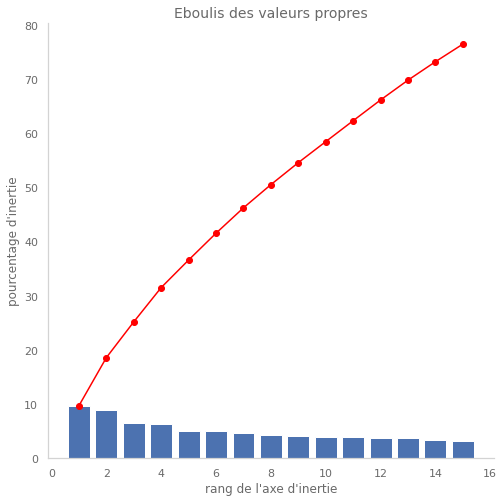

In [24]:
plt.rcParams["figure.figsize"] = (8,8)

vectVarianceExpliquee = pca.explained_variance_ratio_*100 # renvoie les variences expliquées pour chacune des dimensions
plt.bar(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee)
plt.plot(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres",fontsize=14,fontweight='normal')
plt.show()

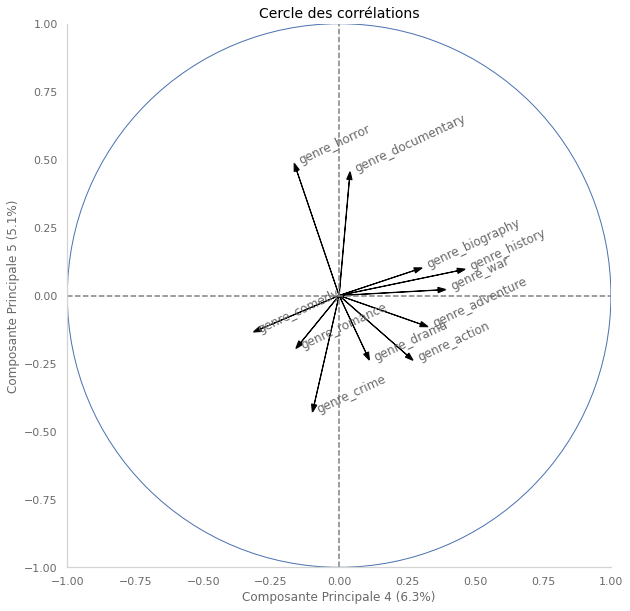

In [25]:
import numpy as np

composantesPrincipales = pca.components_ # triés par variance expliquée

# Selection du plan Factoriel
#dimension 1
d1=3
#dimension 2
d2=4

# taille du schema
plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots()

# configuration de la bordure
plt.xlim(-1,1)
plt.ylim(-1,1)

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# libelles des axes
plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Cercle des corrélations',color="black",fontsize=14,fontweight='normal')
# afficher le cercle
cercle = plt.Circle((0,0),radius=1, color='b', fill=False)
ax.set_aspect(1)
ax.add_patch(cercle)


#placement des étiquettes des p variables + fleches (partant du centre vers les points projetés)
for i in range(len(variables)):
    p=np.array([composantesPrincipales[d1][i],composantesPrincipales[d2][i]])


    # on utilise la distance euclidienne pour n'afficher les labels que pour les individus loin du centre
    distance= np.linalg.norm(p-np.array([0,0]))

    if distance>0.25:
        plt.annotate(variables[i],xy =(composantesPrincipales[d1][i],composantesPrincipales[d2][i]),xytext =(composantesPrincipales[d1][i]+0.01,composantesPrincipales[d2][i]),arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),rotation=25) 
        plt.arrow(0,0,composantesPrincipales[d1][i],composantesPrincipales[d2][i].astype(np.float),length_includes_head=True,head_width=0.02, head_length=0.03,color="black")
    
#import os
#os.system('say "jai fini de travailler"')    

L'analyse en composante principale sur plots n'est pas concluante: il y a beaucoup trop de composantes nécéssaires pour expliquer la variance totale

L'analyse en composante principale sur genres permet de dégager 3 grands genres de films, les thrillers/horreur, les romance/drama et les téléréalités

In [26]:
dfPlots.describe()

,plot_,plot_1000000_b.c.,plot_10_year_old,plot_1190s,plot_12_step_program,plot_12_year_old,plot_12_year_time_span,plot_12th_century,plot_13_year_old,plot_13_year_olds,plot_13th_birthday,plot_14_year_old,plot_14th_century,plot_1520s,plot_15_year_old,...,plot_zealot,plot_zebra,plot_zen,plot_zero_gravity,plot_zeus,plot_zodiac,plot_zodiac_killer,plot_zoloft,plot_zombie,plot_zombie_apocalypse,plot_zombie_spoof,plot_zoo,plot_zookeeper,plot_zoologist,plot_zorro
count,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,...,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000
mean,0.000407,0.000203,0.000203,0.000203,0.000407,0.000407,0.000203,0.000203,0.000203,0.000203,0.000203,0.000407,0.000407,0.000203,0.000407,...,0.000203,0.000407,0.000203,0.000203,0.000407,0.000203,0.000203,0.000203,0.004676,0.001626,0.000407,0.000610,0.000203,0.000203,0.000407
std,0.020162,0.014258,0.014258,0.014258,0.020162,0.020162,0.014258,0.014258,0.014258,0.014258,0.014258,0.020162,0.020162,0.014258,0.020162,...,0.014258,0.020162,0.014258,0.014258,0.020162,0.014258,0.014258,0.014258,0.068226,0.040299,0.020162,0.024691,0.014258,0.014258,0.020162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <font color=#ffb703>Boxplots</font>

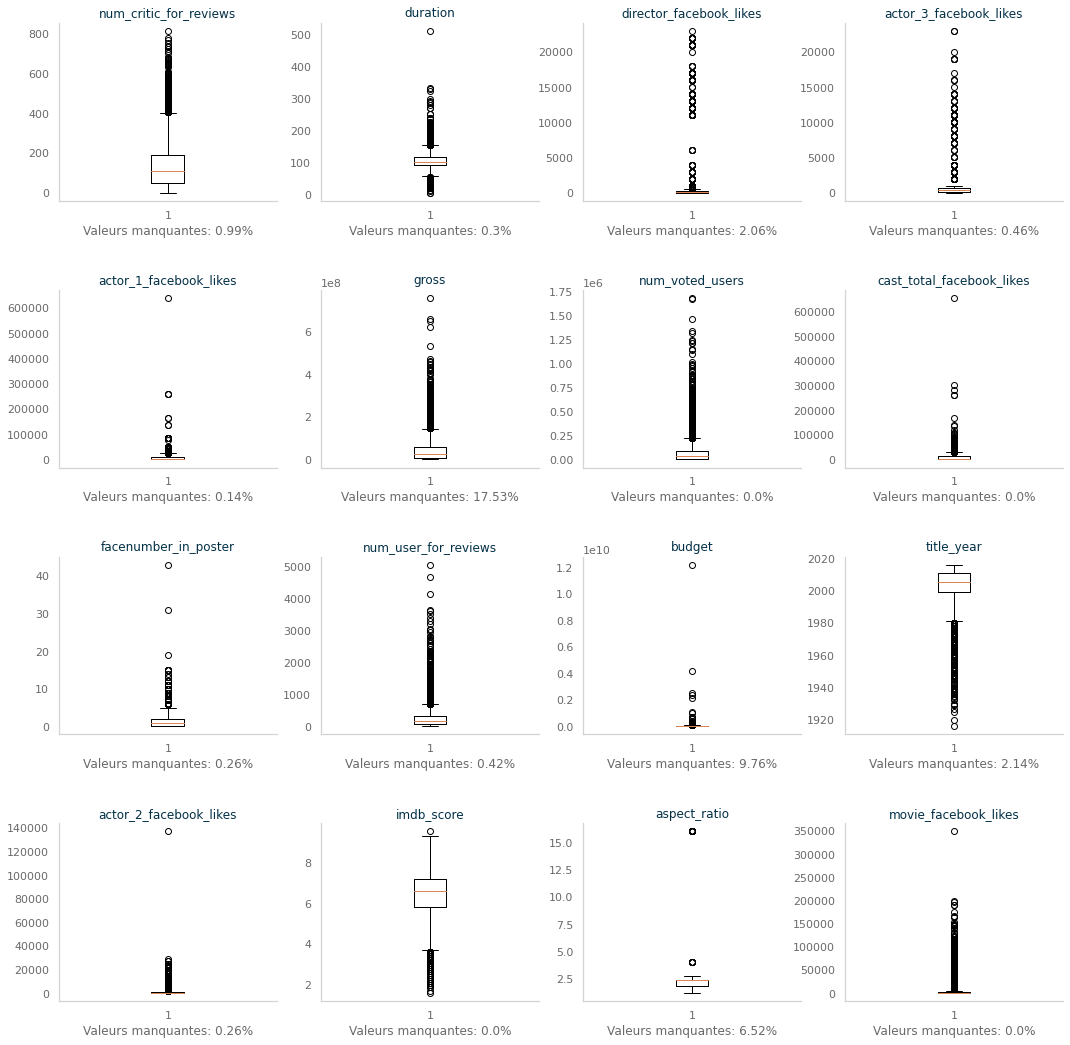

In [27]:
plt.rcParams["figure.figsize"] = (60,20)

fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(18,18))
plt.subplots_adjust(hspace=.5)
axes=axes.flatten()

i=0
for x in colonnesQuantitatives:
        #print(x) #debug
        # on dessine le boxplot en excluant les valeurs manquantes pour chaque variable quantitative
        axes[i].boxplot(dfUnique[x].dropna())
        axes[i].set_title(x,color='#023047')
        axes[i].set_xlabel('Valeurs manquantes: '+str(sPourcentageValeursManquantes[x])+'%')
        i+=1

### <font color=#ffb703>Matrice de correlation</font>

In [28]:
matriceCorrelation=(dfUnique[colonnesQuantitatives].dropna()).corr()
matriceCorrelation.style.background_gradient(cmap='coolwarm').set_precision(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.00,0.22,0.18,0.25,0.17,0.46,0.59,0.24,-0.03,0.56,0.10,0.41,0.25,0.35,0.18,0.70
duration,0.22,1.00,0.18,0.12,0.08,0.24,0.33,0.12,0.03,0.34,0.06,-0.14,0.13,0.37,0.15,0.21
director_facebook_likes,0.18,0.18,1.00,0.12,0.09,0.14,0.31,0.12,-0.05,0.22,0.02,-0.05,0.12,0.19,0.04,0.17
actor_3_facebook_likes,0.25,0.12,0.12,1.00,0.25,0.28,0.26,0.48,0.11,0.20,0.04,0.11,0.54,0.07,0.05,0.27
actor_1_facebook_likes,0.17,0.08,0.09,0.25,1.00,0.14,0.18,0.95,0.06,0.13,0.02,0.09,0.39,0.09,0.06,0.13
gross,0.46,0.24,0.14,0.28,0.14,1.00,0.63,0.23,-0.03,0.55,0.09,0.04,0.24,0.21,0.07,0.36
num_voted_users,0.59,0.33,0.31,0.26,0.18,0.63,1.00,0.25,-0.03,0.78,0.06,0.02,0.24,0.48,0.09,0.52
cast_total_facebook_likes,0.24,0.12,0.12,0.48,0.95,0.23,0.25,1.00,0.08,0.18,0.03,0.12,0.64,0.11,0.07,0.20
facenumber_in_poster,-0.03,0.03,-0.05,0.11,0.06,-0.03,-0.03,0.08,1.00,-0.08,-0.02,0.07,0.07,-0.07,0.02,0.01
num_user_for_reviews,0.56,0.34,0.22,0.20,0.13,0.55,0.78,0.18,-0.08,1.00,0.07,0.02,0.19,0.33,0.09,0.38


On remarque une tres forte correlation entre:\
* cast_total_facebook_likes / actor_1_facebook_likes
* num_user_for_reviews / num_voted_users

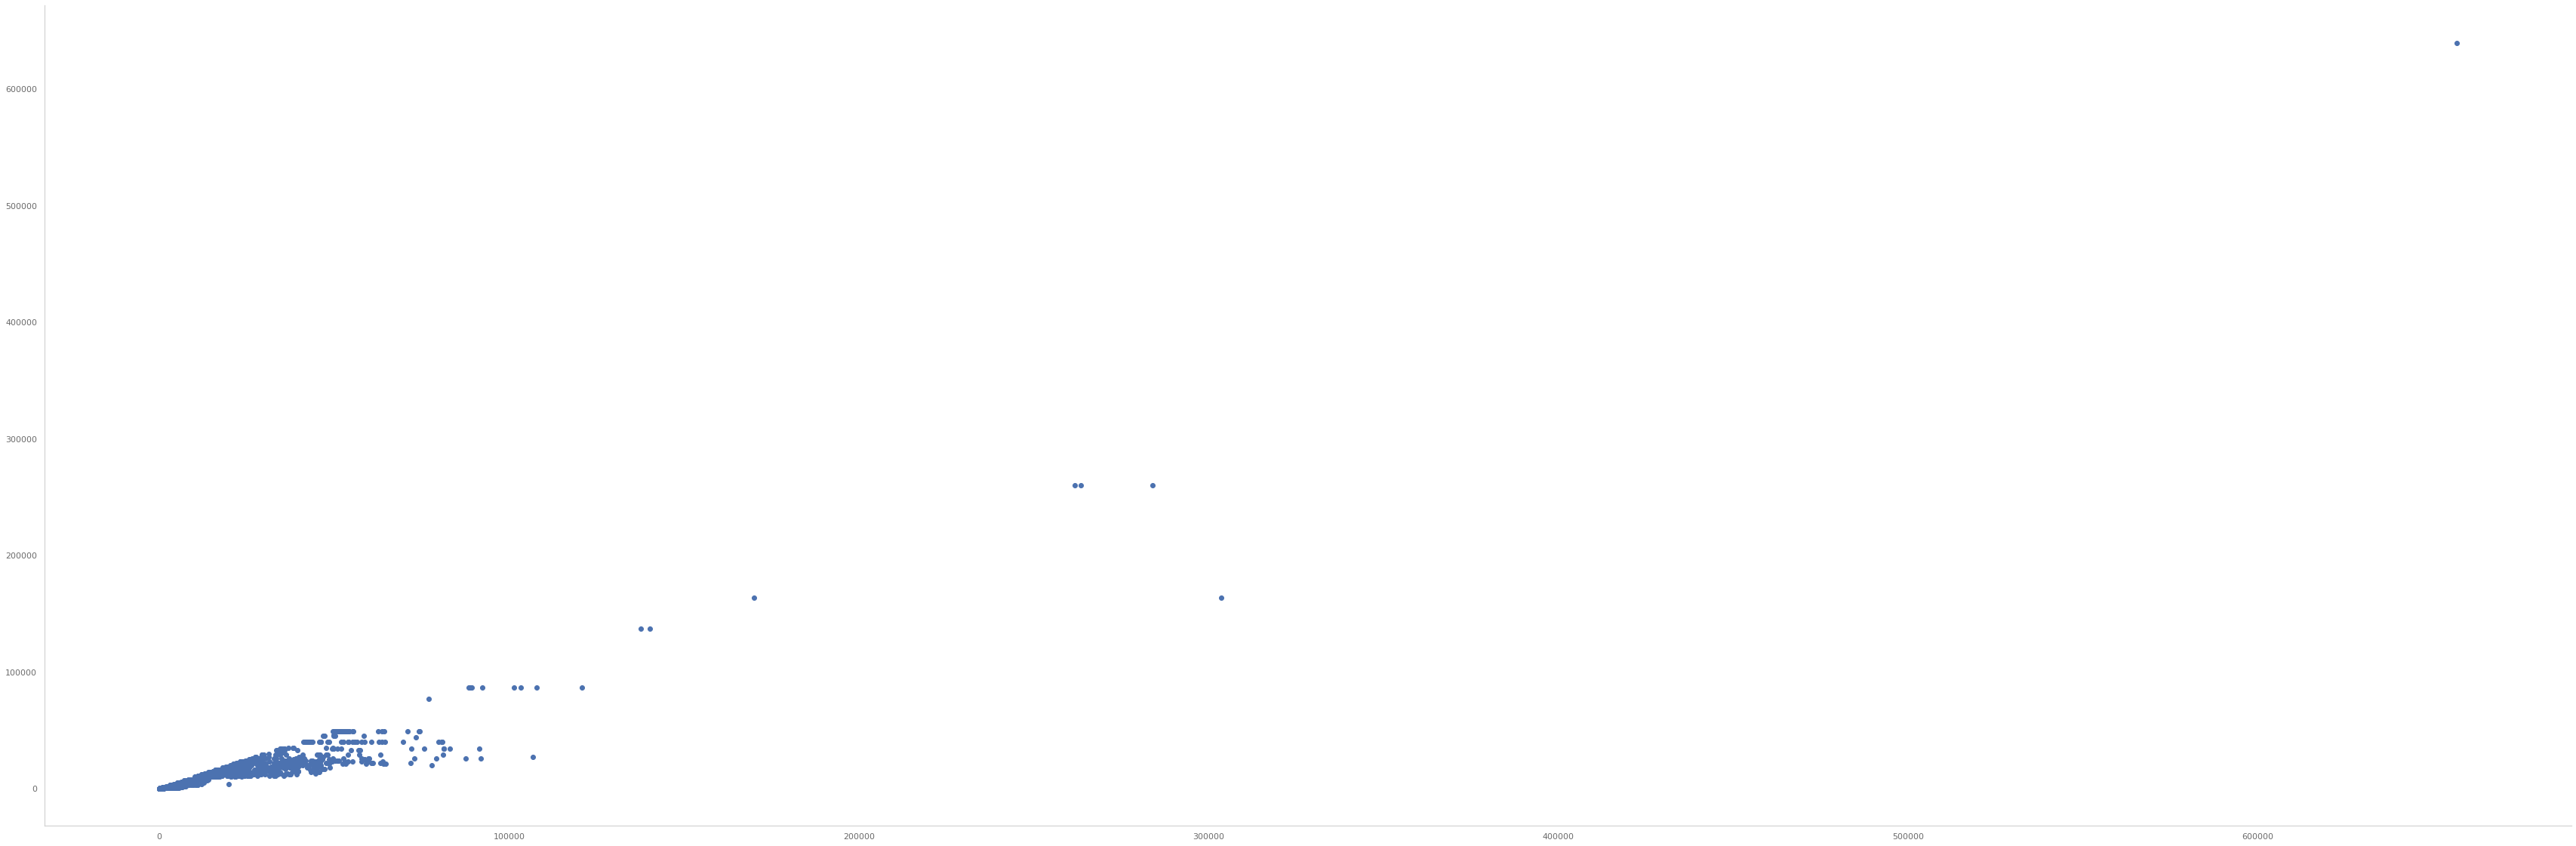

In [29]:
from matplotlib import pyplot as plt

plt.scatter(dfUnique[colonnesQuantitatives]['cast_total_facebook_likes'],dfUnique[colonnesQuantitatives]['actor_1_facebook_likes'])

In [30]:
import statsmodels.api as sm
dfComplete=dfUnique.dropna()
X=dfComplete[colonnesQuantitatives]['cast_total_facebook_likes']

# ajout de la constante
X=sm.add_constant(X)

y=dfComplete[colonnesQuantitatives]['actor_1_facebook_likes']

model=sm.OLS(y,X)

results=model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     actor_1_facebook_likes   R-squared:                       0.896
Model:                                OLS   Adj. R-squared:                  0.896
Method:                     Least Squares   F-statistic:                 3.151e+04
Date:                    Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                            11:42:36   Log-Likelihood:                -36349.
No. Observations:                    3656   AIC:                         7.270e+04
Df Residuals:                        3654   BIC:                         7.271e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Remarques:
* R^2 proche de 0,9 , score significatif
* la variable cast_total_facebook_likes explique 77% de la variable actor_1_facebook_likes avec une p-value à 0 (qui confirme l'hypothese alternative que le coefficient est different de 0)
* taux de valeurs manquantes de cast_total_facebook_likes (0%) < taux de valeurs manquantes de actor_1_facebook_likes (14%)

=> on exclue la variable cast_total_facebook_likes de notre etude

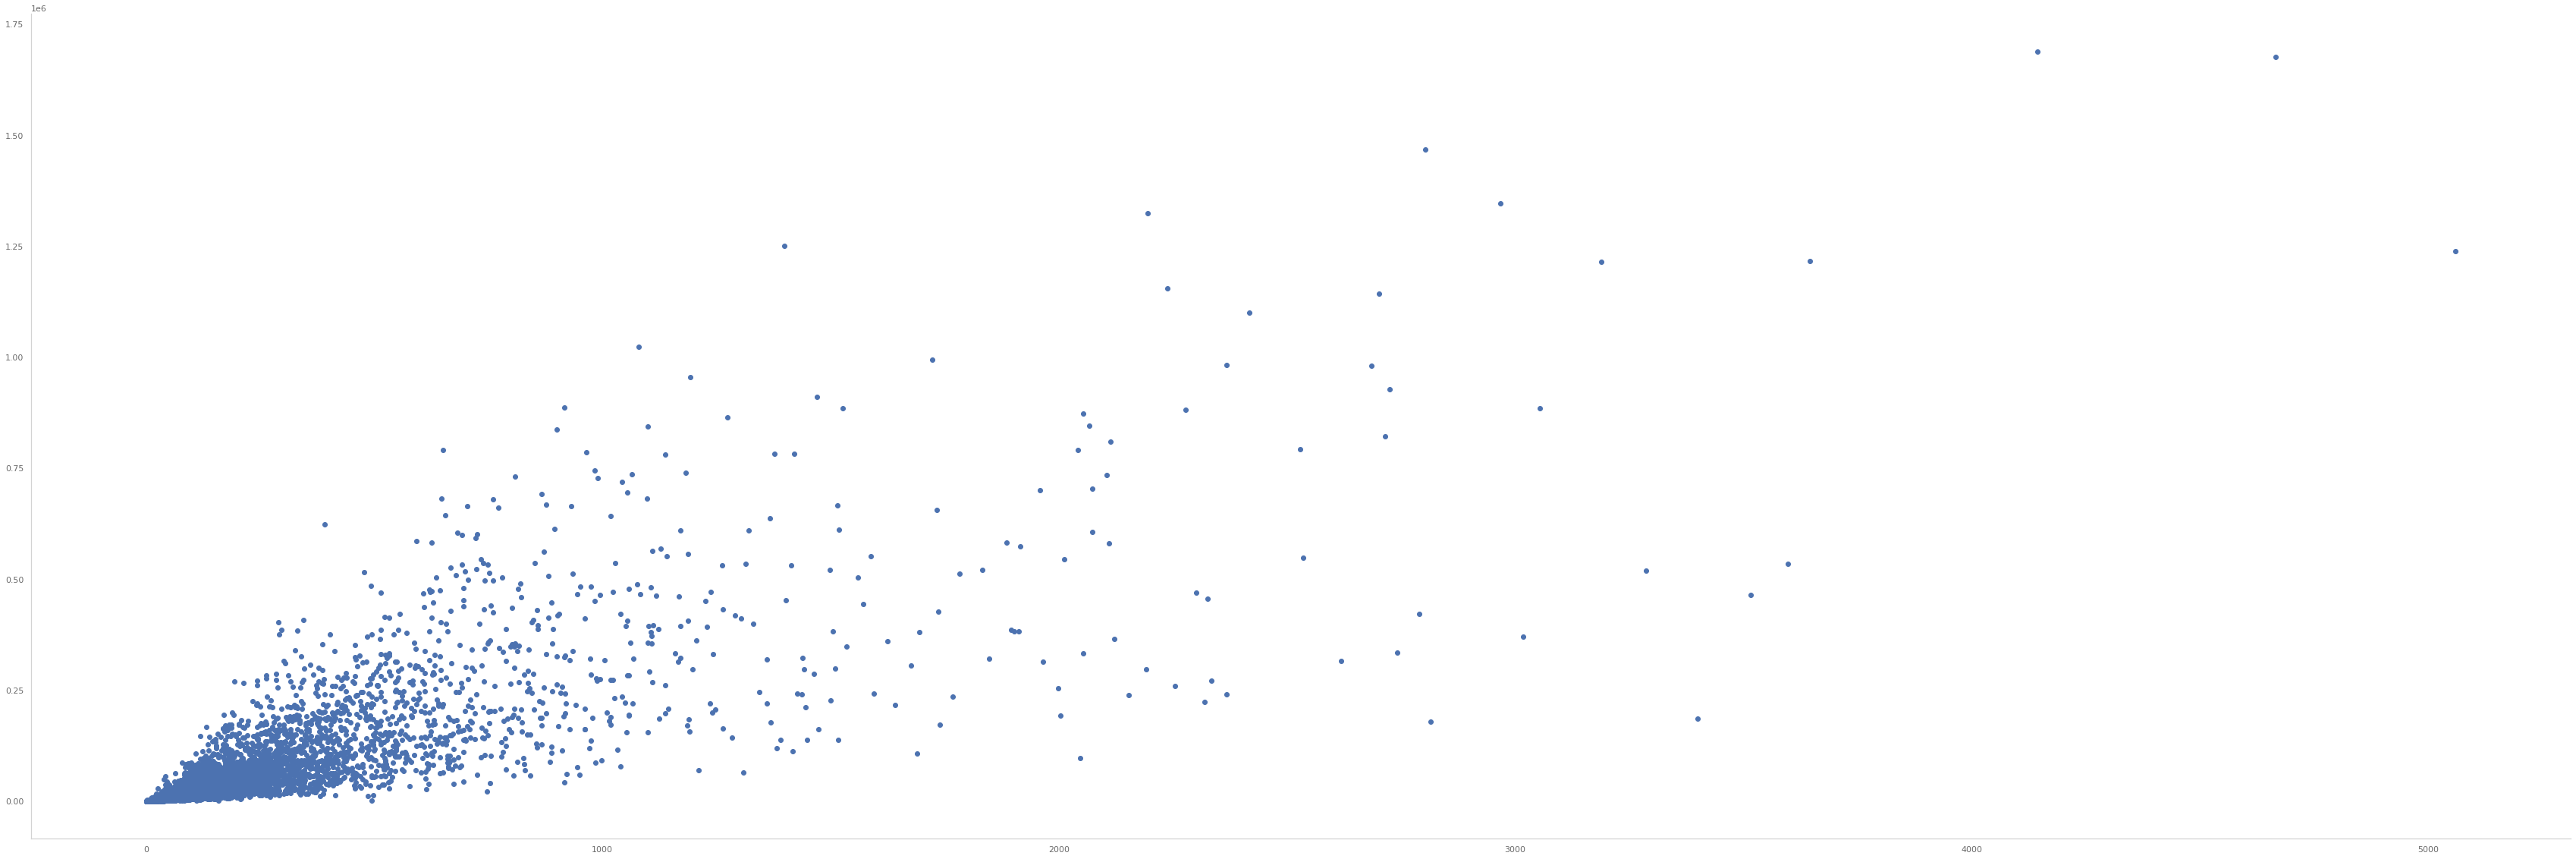

In [31]:
plt.scatter(dfUnique[colonnesQuantitatives]['num_user_for_reviews'],dfUnique[colonnesQuantitatives]['num_voted_users'])

In [32]:
import statsmodels.api as sm
dfComplete=dfUnique.dropna()
X=dfComplete[colonnesQuantitatives]['num_user_for_reviews']

# ajout de la constante
X=sm.add_constant(X)

y=dfComplete[colonnesQuantitatives]['num_voted_users']

model=sm.OLS(y,X)

results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        num_voted_users   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     5789.
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:42:36   Log-Likelihood:                -47075.
No. Observations:                3656   AIC:                         9.415e+04
Df Residuals:                    3654   BIC:                         9.417e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7679.3244 

Remarques:
* R^2 proche de 0,6 , score peu significatif

=> le score R^2 n'est pas suffisamment signicatif: on va garder num_user_for_reviews et num_voted_users dans notre etude

### <font color=#ffb703>Histogrammes</font>

In [33]:
# fonction mode qui agrege les variables qui sont sous un seuil 'threshold'(pour les très gros dataframe qui ont du mal à plotter)
def summarizeFrequenciesDf(df,threshold):
    dfFrequencies=df.value_counts(normalize=True) # frequence normalisée des valeurs de chaque variable
    mask = dfFrequencies>threshold # masque sur les fréquences > seuil
    dfTail= dfFrequencies.loc[~mask].sum()
    dfFrequencies=dfFrequencies.loc[mask] # filtre sur les fréquences < seuil
    dfFrequencies['autres']=dfTail # ajout des fréquences > seuil agregées dans la categorie 'Autre'
    return pd.DataFrame(dfFrequencies)

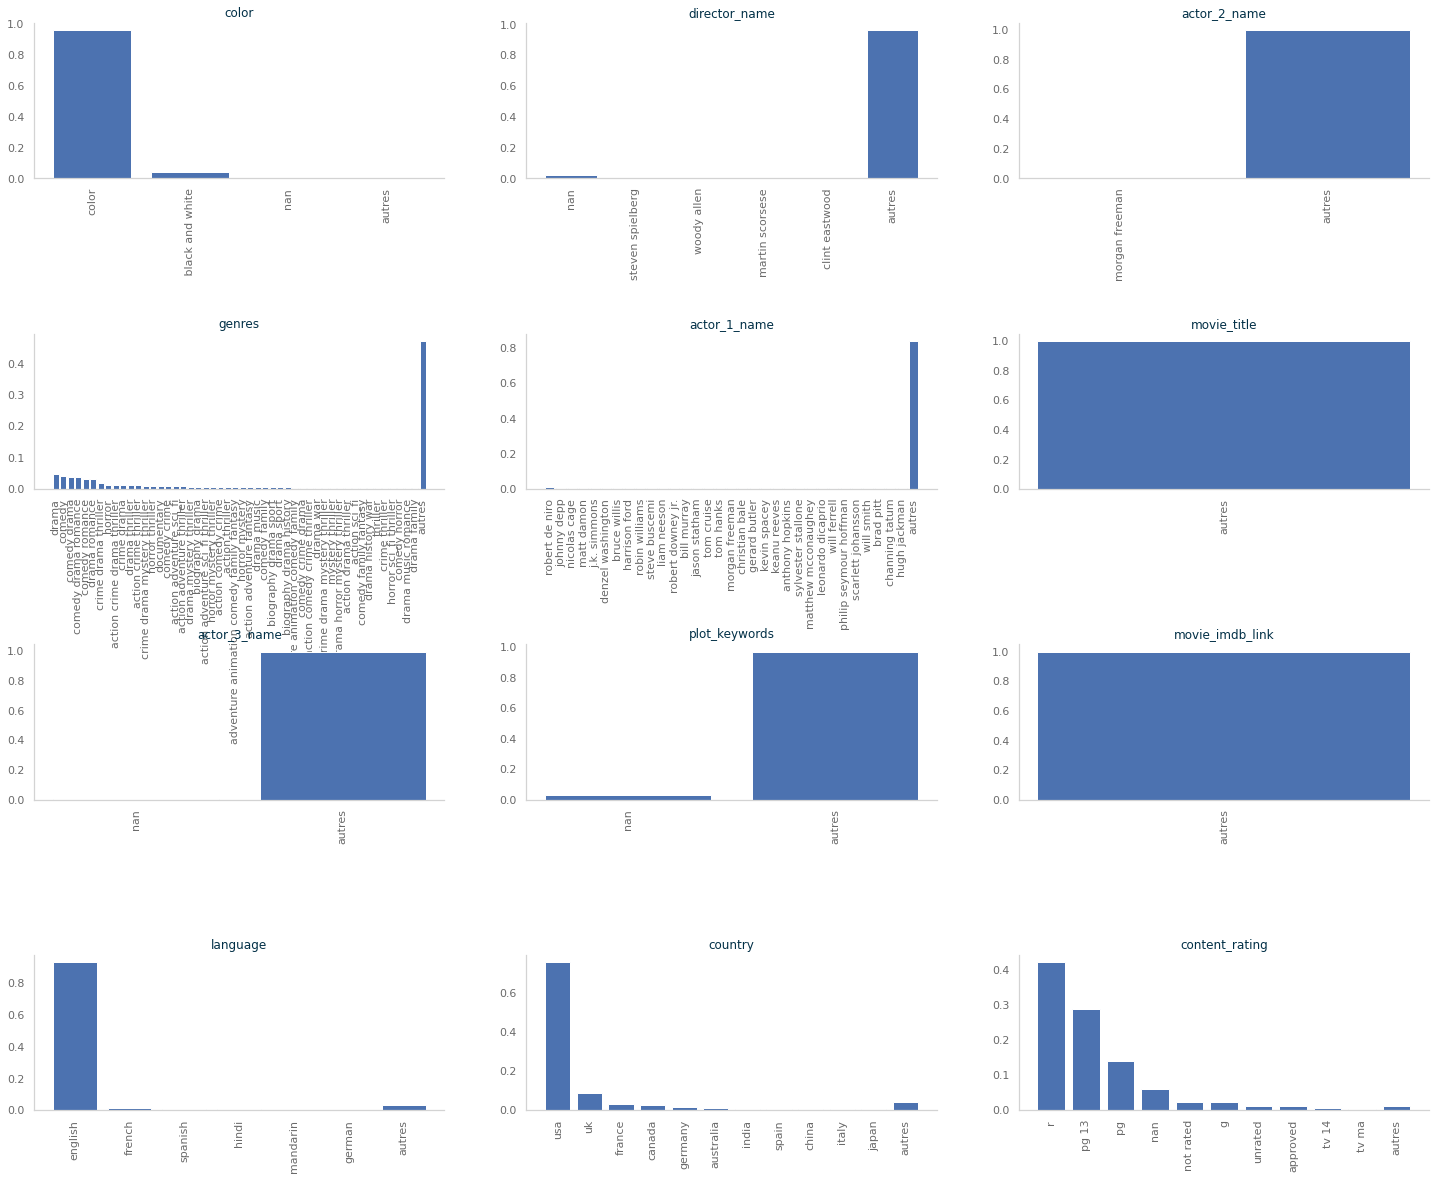

In [34]:
plt.rcParams["figure.figsize"] = (100,40)
#plt.rcParams['font.size'] = '7.0'

fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(25,20))

# axes est un tableau à 2 dimensions: lignes, colonnes
# pour parcourir les subplot, il faut réduire axes à une dimension avec flatten
axes=axes.flatten()

# espace vertical entre les rangées de sous graphiques
plt.subplots_adjust(hspace=1)
# initialisation du compteur
i=0

# histogrammes des variables qualitatives
for x in colonnesQualitatives:
    # passe les labels sur l'axe des x en arriere plan
    axes[i].xaxis.label.set_visible(False)
    
    dfCourant=summarizeFrequenciesDf(dfQualitativesUniformisees[x],0.0035)

    axes[i].bar(dfCourant[x].index,dfCourant[x])
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(x,color='#023047')

    i=i+1

#fig.suptitle("Données Qualitatives - Mode", fontsize=14)
plt.show()

In [35]:
dfCleaned=pd.merge(dfQualitativesUniformisees,dfUnique[colonnesQuantitatives], left_index=True, right_index=True)
dfCleaned=dfCleaned.drop(columns='cast_total_facebook_likes')

In [36]:
dfCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4919 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   color                    4919 non-null   object 
 1   director_name            4919 non-null   object 
 2   actor_2_name             4919 non-null   object 
 3   genres                   4919 non-null   object 
 4   actor_1_name             4919 non-null   object 
 5   movie_title              4919 non-null   object 
 6   actor_3_name             4919 non-null   object 
 7   plot_keywords            4919 non-null   object 
 8   movie_imdb_link          4919 non-null   object 
 9   language                 4919 non-null   object 
 10  country                  4919 non-null   object 
 11  content_rating           4919 non-null   object 
 12  num_critic_for_reviews   4870 non-null   float64
 13  duration                 4904 non-null   float64
 14  director_facebook_likes 

### <font color=#ffb703>Ecriture des donnees</font>

In [37]:
dfCleaned.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,color,james cameron,joel david moore,action adventure fantasy sci_fi,cch pounder,avatar,wes studi,avatar future marine native paraplegic,http //www.imdb.com/title/tt0499549/?ref_=fn_t...,english,usa,pg 13,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,color,gore verbinski,orlando bloom,action adventure fantasy,johnny depp,pirates of the caribbean at world end,jack davenport,goddess marriage_ceremony marriage_proposal pi...,http //www.imdb.com/title/tt0449088/?ref_=fn_t...,english,usa,pg 13,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,color,sam mendes,rory kinnear,action adventure thriller,christoph waltz,spectre,stephanie sigman,bomb espionage sequel spy terrorist,http //www.imdb.com/title/tt2379713/?ref_=fn_t...,english,uk,pg 13,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,color,christopher nolan,christian bale,action thriller,tom hardy,the dark knight rises,joseph gordon levitt,deception imprisonment lawlessness police_offi...,http //www.imdb.com/title/tt1345836/?ref_=fn_t...,english,usa,pg 13,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,nan,doug walker,rob walker,documentary,doug walker,star wars episode vii the force awakens ...,nan,nan,http //www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,nan,nan,NaN,NaN,131.0,NaN,131.0,NaN,8,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0


In [38]:
dfCleaned.to_csv('movie_metadata_clean.csv',index=False)
dfPlots.to_csv('movie_plots.csv',index=False)
dfGenres.to_csv('movie_genres.csv',index=False)

In [39]:
now=time.time()
now-start

36.808133125305176